In [48]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df_airlines = pd.read_csv('airlines.csv')
df_airports = pd.read_csv('airports.csv')
df_flights = pd.read_csv('flights.csv', low_memory=False)
df_flights_backup = df_flights.copy()

In [5]:
# backup to not rerun the read_csv again
df_flights = df_flights_backup.copy()

In [6]:
df_flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10487,2015,1,1,4,EV,5433,N712EV,VPS,ATL,1739,...,1924.0,-27.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
10488,2015,1,1,4,EV,6112,N16112,MSP,IAD,1739,...,2048.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
10489,2015,1,1,4,OO,4837,N820SK,PHX,SEA,1739,...,1922.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
10490,2015,1,1,4,US,808,N251AY,STT,CLT,1740,...,2128.0,57.0,0.0,0.0,NaN,38.0,0.0,15.0,4.0,0.0


In [7]:
df_airports

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


Let's clean our Datasets first by removing null values.

In [8]:
df_flights.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER               13
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME           396
DEPARTURE_DELAY          397
TAXI_OUT                 399
WHEELS_OFF               399
SCHEDULED_TIME             1
ELAPSED_TIME             418
AIR_TIME                 418
DISTANCE                   1
WHEELS_ON                405
TAXI_IN                  405
SCHEDULED_ARRIVAL          1
ARRIVAL_TIME             405
ARRIVAL_DELAY            418
DIVERTED                   1
CANCELLED                  1
CANCELLATION_REASON    10091
AIR_SYSTEM_DELAY        8635
SECURITY_DELAY          8635
AIRLINE_DELAY           8635
LATE_AIRCRAFT_DELAY     8635
WEATHER_DELAY           8635
dtype: int64

In [9]:
for col in df_flights.columns:
    print(col, df_flights[col].unique())

YEAR [2015]
MONTH [1]
DAY [1]
DAY_OF_WEEK [4]
AIRLINE ['AS' 'AA' 'US' 'DL' 'NK' 'UA' 'HA' 'B6' 'OO' 'EV' 'MQ' 'F9' 'WN' 'VX']
FLIGHT_NUMBER [  98 2336  840 ... 5642 1681 4837]
TAIL_NUMBER ['N407AS' 'N3KUAA' 'N171US' ... 'N69824' 'N5ERAA' 'N987AT']
ORIGIN_AIRPORT ['ANC' 'LAX' 'SFO' 'SEA' 'LAS' 'DEN' 'SLC' 'PDX' 'FAI' 'MSP' 'PHX' 'SJU'
 'PBG' 'IAG' 'PSE' 'BQN' 'ORD' 'GEG' 'HNL' 'ONT' 'MCO' 'BOS' 'HIB' 'ABR'
 'MAF' 'DFW' 'MKE' 'IAH' 'BNA' 'BRO' 'VPS' 'BOI' 'BJI' 'SGF' 'PHL' 'SBN'
 'RDD' 'EUG' 'IAD' 'BUF' 'PWM' 'JFK' 'CRP' 'PIA' 'FAT' 'SMF' 'AUS' 'MCI'
 'ATL' 'JAX' 'MFR' 'IDA' 'MSN' 'DCA' 'SAT' 'CHS' 'SBA' 'SMX' 'IND' 'CLE'
 'GSP' 'BDL' 'ABI' 'RIC' 'BFL' 'OMA' 'RDM' 'FLL' 'CID' 'TPA' 'SYR' 'ROC'
 'TYR' 'LAN' 'XNA' 'GSO' 'EWR' 'PBI' 'RSW' 'OAK' 'PVD' 'RNO' 'PIT' 'ABQ'
 'MIA' 'BWI' 'LGA' 'TUL' 'LIT' 'MSY' 'OKC' 'ATW' 'PNS' 'MEM' 'TYS' 'MHT'
 'SAV' 'CLT' 'GRB' 'ABE' 'JAN' 'OAJ' 'FAR' 'ERI' 'LEX' 'CWA' 'MSO' 'TTN'
 'AMA' 'CLL' 'HOU' 'JLN' 'MLI' 'RDU' 'CVG' 'MHK' 'MOB' 'TLH' 'BHM' 'CAE'
 'TXK' 

In [10]:
df_flights.loc[df_flights['CANCELLATION_REASON'].notnull()]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
32,2015,1,1,4,AS,136,N431AS,ANC,SEA,135,...,NaN,NaN,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN
42,2015,1,1,4,AA,2459,N3BDAA,PHX,DFW,200,...,NaN,NaN,0.0,1.0,B,NaN,NaN,NaN,NaN,NaN
68,2015,1,1,4,OO,5254,N746SK,MAF,IAH,510,...,NaN,NaN,0.0,1.0,B,NaN,NaN,NaN,NaN,NaN
82,2015,1,1,4,MQ,2859,N660MQ,SGF,DFW,525,...,NaN,NaN,0.0,1.0,B,NaN,NaN,NaN,NaN,NaN
90,2015,1,1,4,OO,5460,N583SW,RDD,SFO,530,...,NaN,NaN,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10333,2015,1,1,4,WN,4774,N406WN,AUS,DAL,1730,...,NaN,NaN,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN
10334,2015,1,1,4,WN,2349,N521SW,DAL,HOU,1730,...,NaN,NaN,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN
10390,2015,1,1,4,OO,2636,N988CA,ORD,MKE,1730,...,NaN,NaN,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN
10454,2015,1,1,4,MQ,3240,N925MQ,PIA,DFW,1735,...,NaN,NaN,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN


CANCELLATION_REASON is just letters A, B this is useless remove this column.

The last 5 columns has many nulls and the same number of nulls let's see that.

In [11]:
df_flights.loc[df_flights['AIRLINE_DELAY'].notnull()]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
27,2015,1,1,4,NK,597,N528NK,MSP,FLL,115,...,607.0,25.0,0.0,0.0,NaN,25.0,0.0,0.0,0.0,0.0
30,2015,1,1,4,NK,168,N629NK,PHX,ORD,125,...,632.0,43.0,0.0,0.0,NaN,43.0,0.0,0.0,0.0,0.0
35,2015,1,1,4,HA,17,N389HA,LAS,HNL,145,...,610.0,15.0,0.0,0.0,NaN,0.0,0.0,15.0,0.0,0.0
50,2015,1,1,4,B6,1030,N239JB,BQN,MCO,307,...,520.0,20.0,0.0,0.0,NaN,20.0,0.0,0.0,0.0,0.0
52,2015,1,1,4,B6,2134,N307JB,SJU,MCO,400,...,730.0,85.0,0.0,0.0,NaN,0.0,0.0,85.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10476,2015,1,1,4,UA,1583,N76269,ATL,EWR,1738,...,2015.0,15.0,0.0,0.0,NaN,0.0,0.0,6.0,9.0,0.0
10479,2015,1,1,4,EV,3921,N17196,IAH,TUL,1738,...,1944.0,33.0,0.0,0.0,NaN,0.0,0.0,33.0,0.0,0.0
10481,2015,1,1,4,OO,6287,N290SW,SBA,SFO,1738,...,1940.0,39.0,0.0,0.0,NaN,0.0,0.0,0.0,39.0,0.0
10483,2015,1,1,4,UA,311,N404UA,IAH,OKC,1739,...,2040.0,94.0,0.0,0.0,NaN,0.0,0.0,30.0,64.0,0.0


It's the delay in time made by AIR_SYSTEM and AIRLINE and WEATHER AND AIRCRAFT they have many null values so remove them .

In [12]:
df_flights.drop(df_flights.columns[25:31], axis=1, inplace=True)

We can't drop the rows which contains null in any column as for example the ELAPSED_TIME and AIR_TIME couldn't be recorded as the whole trip is canceled or diverted, so.

In [13]:
df_flights.loc[(df_flights['CANCELLED'] == True)]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
32,2015,1,1,4,AS,136,N431AS,ANC,SEA,135,...,NaN,NaN,1448.0,NaN,NaN,600.0,NaN,NaN,0.0,1.0
42,2015,1,1,4,AA,2459,N3BDAA,PHX,DFW,200,...,NaN,NaN,868.0,NaN,NaN,500.0,NaN,NaN,0.0,1.0
68,2015,1,1,4,OO,5254,N746SK,MAF,IAH,510,...,NaN,NaN,429.0,NaN,NaN,637.0,NaN,NaN,0.0,1.0
82,2015,1,1,4,MQ,2859,N660MQ,SGF,DFW,525,...,NaN,NaN,364.0,NaN,NaN,700.0,NaN,NaN,0.0,1.0
90,2015,1,1,4,OO,5460,N583SW,RDD,SFO,530,...,NaN,NaN,199.0,NaN,NaN,700.0,NaN,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10333,2015,1,1,4,WN,4774,N406WN,AUS,DAL,1730,...,NaN,NaN,189.0,NaN,NaN,1825.0,NaN,NaN,0.0,1.0
10334,2015,1,1,4,WN,2349,N521SW,DAL,HOU,1730,...,NaN,NaN,239.0,NaN,NaN,1830.0,NaN,NaN,0.0,1.0
10390,2015,1,1,4,OO,2636,N988CA,ORD,MKE,1730,...,NaN,NaN,67.0,NaN,NaN,1810.0,NaN,NaN,0.0,1.0
10454,2015,1,1,4,MQ,3240,N925MQ,PIA,DFW,1735,...,NaN,NaN,672.0,NaN,NaN,1950.0,NaN,NaN,0.0,1.0


In [14]:
df_flights.loc[(df_flights['DIVERTED'] == True)]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
724,2015,1,1,4,DL,716,N944DL,OMA,ATL,645,...,NaN,NaN,821.0,1447.0,4.0,1009.0,1451.0,NaN,1.0,0.0
1455,2015,1,1,4,OO,5237,N712SK,MKE,IAH,745,...,NaN,NaN,984.0,1456.0,9.0,1041.0,1505.0,NaN,1.0,0.0
2218,2015,1,1,4,WN,1966,N685SW,ATL,JAX,845,...,NaN,NaN,270.0,1214.0,5.0,1000.0,1219.0,NaN,1.0,0.0
2526,2015,1,1,4,EV,4555,N12552,IAH,HRL,902,...,NaN,NaN,295.0,1314.0,5.0,1017.0,1319.0,NaN,1.0,0.0
2866,2015,1,1,4,WN,1081,N214WN,MDW,OKC,930,...,NaN,NaN,691.0,1340.0,3.0,1135.0,1343.0,NaN,1.0,0.0
4225,2015,1,1,4,AA,1279,N541AA,OMA,DFW,1100,...,NaN,NaN,583.0,1826.0,12.0,1300.0,1838.0,NaN,1.0,0.0
4394,2015,1,1,4,OO,4506,N613SK,SLC,SUN,1110,...,NaN,NaN,222.0,1349.0,4.0,1225.0,1353.0,NaN,1.0,0.0
4574,2015,1,1,4,EV,6171,N17159,DEN,GUC,1122,...,NaN,NaN,152.0,1630.0,5.0,1218.0,1635.0,NaN,1.0,0.0
4636,2015,1,1,4,EV,4169,N11547,IAH,ABQ,1125,...,NaN,NaN,744.0,1615.0,15.0,1243.0,1630.0,NaN,1.0,0.0
4639,2015,1,1,4,EV,4654,N29515,IAH,HRL,1125,...,NaN,NaN,295.0,NaN,NaN,1240.0,NaN,NaN,1.0,0.0


We can drop the rows which contains null and shouldn't have true in canceled or diverted.

In [15]:
df_flights[(df_flights['CANCELLED'] == 1) | (df_flights['DIVERTED'] == 1)]=df_flights[(df_flights['CANCELLED'] == 1) | (df_flights['DIVERTED'] == 1)].fillna(0)

In [16]:
df_flights.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        1
TAXI_OUT               1
WHEELS_OFF             1
SCHEDULED_TIME         1
ELAPSED_TIME           1
AIR_TIME               1
DISTANCE               1
WHEELS_ON              1
TAXI_IN                1
SCHEDULED_ARRIVAL      1
ARRIVAL_TIME           1
ARRIVAL_DELAY          1
DIVERTED               1
CANCELLED              1
dtype: int64

In [17]:
df_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [18]:
df_airports['COUNTRY'].unique()

array(['USA'], dtype=object)

Airports has useless column (COUNTRY) which contain 1 distinct value "USA".

In [19]:
df_airports.drop('COUNTRY', axis=1, inplace=True)

drop the airports that i don't know it's geolocation. 3 rows deleted.

In [20]:
df_airports.dropna(inplace=True)

Now remove the outliers.

Integrating the flights with airlines where df_flights.AIRLINE -> df_airlines.IATA_CODE, one airline to many flights.

After that we don't need the IATA_CODE in our DF anymore as we have the airport name.

In [21]:
df_integrated = pd.merge(df_flights, df_airlines, left_on="AIRLINE", right_on="IATA_CODE")
df_integrated.drop(['IATA_CODE','AIRLINE_x'], axis=1, inplace=True)
df_integrated.rename(columns={"AIRLINE_y": "AIRLINE"}, inplace =True)

In [22]:
display(df_integrated)

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIRLINE
0,2015,1,1,4,98,N407AS,ANC,SEA,5,2354.0,...,169.0,1448.0,404.0,4.0,430.0,408.0,-22.0,0.0,0.0,Alaska Airlines Inc.
1,2015,1,1,4,135,N527AS,SEA,ANC,25,24.0,...,199.0,1448.0,254.0,5.0,320.0,259.0,-21.0,0.0,0.0,Alaska Airlines Inc.
2,2015,1,1,4,108,N309AS,ANC,SEA,45,41.0,...,173.0,1448.0,451.0,4.0,509.0,455.0,-14.0,0.0,0.0,Alaska Airlines Inc.
3,2015,1,1,4,122,N413AS,ANC,PDX,50,46.0,...,187.0,1542.0,504.0,3.0,525.0,507.0,-18.0,0.0,0.0,Alaska Airlines Inc.
4,2015,1,1,4,130,N457AS,FAI,SEA,115,107.0,...,186.0,1533.0,538.0,7.0,548.0,545.0,-3.0,0.0,0.0,Alaska Airlines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10487,2015,1,1,4,169,N637VA,EWR,LAX,1725,1743.0,...,347.0,2454.0,2044.0,9.0,2045.0,2053.0,8.0,0.0,0.0,Virgin America
10488,2015,1,1,4,193,N624VA,EWR,SFO,1729,1749.0,...,352.0,2565.0,2054.0,6.0,2115.0,2100.0,-15.0,0.0,0.0,Virgin America
10489,2015,1,1,4,720,N527VA,SFO,DAL,1730,1825.0,...,185.0,1476.0,2339.0,4.0,2250.0,2343.0,53.0,0.0,0.0,Virgin America
10490,2015,1,1,4,347,N631VA,FLL,SFO,1735,1743.0,...,335.0,2583.0,2033.0,7.0,2055.0,2040.0,-15.0,0.0,0.0,Virgin America


Integrate result with airports.
df_flights.ORIGIN_AIRPORT, df_flights.DESTINATION_AIRPORT -> df_airports.IATA_CODE, one airport to many flights.

In [23]:
# integrate with the source airport first.
df_integrated_origin = pd.merge(df_integrated, df_airports, left_on="ORIGIN_AIRPORT", right_on="IATA_CODE")
df_integrated_origin.drop(['ORIGIN_AIRPORT','IATA_CODE'], axis=1, inplace=True)

In [24]:
display(df_integrated_origin)

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIRLINE,AIRPORT,CITY,STATE,LATITUDE,LONGITUDE
0,2015,1,1,4,98,N407AS,SEA,5,2354.0,-11.0,...,408.0,-22.0,0.0,0.0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619
1,2015,1,1,4,108,N309AS,SEA,45,41.0,-4.0,...,455.0,-14.0,0.0,0.0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619
2,2015,1,1,4,122,N413AS,PDX,50,46.0,-4.0,...,507.0,-18.0,0.0,0.0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619
3,2015,1,1,4,136,N431AS,SEA,135,0.0,0.0,...,0.0,0.0,0.0,1.0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619
4,2015,1,1,4,134,N464AS,SEA,155,140.0,-15.0,...,558.0,-35.0,0.0,0.0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10480,2015,1,1,4,1004,N8315C,TPA,1350,1409.0,19.0,...,1711.0,16.0,0.0,0.0,Southwest Airlines Co.,Long Island MacArthur Airport,Islip,NY,40.79524,-73.10021
10481,2015,1,1,4,1644,N939WN,MCO,1400,1406.0,6.0,...,1653.0,3.0,0.0,0.0,Southwest Airlines Co.,Long Island MacArthur Airport,Islip,NY,40.79524,-73.10021
10482,2015,1,1,4,3228,N225WN,FLL,1445,1453.0,8.0,...,1749.0,-1.0,0.0,0.0,Southwest Airlines Co.,Long Island MacArthur Airport,Islip,NY,40.79524,-73.10021
10483,2015,1,1,4,527,N762SW,BWI,1505,1501.0,-4.0,...,1607.0,-13.0,0.0,0.0,Southwest Airlines Co.,Long Island MacArthur Airport,Islip,NY,40.79524,-73.10021


Rename the inserted columns of the airport in integrated dataframe with origin_{column_name}

In [25]:
df_integrated_origin.rename(columns={"AIRPORT": "ORIGIN_AIRPORT", "CITY": "ORIGIN_CITY", "STATE": "ORIGIN_STATE", "LATITUDE": "ORIGIN_LATITUDE", "LONGITUDE": "ORIGIN_LONGITUDE"}, inplace=True)

Integrate with the destination airport.

In [26]:
df_full_integration = pd.merge(df_integrated_origin, df_airports, left_on="DESTINATION_AIRPORT", right_on="IATA_CODE")
df_full_integration.drop(['DESTINATION_AIRPORT','IATA_CODE'], axis=1, inplace=True)

In [27]:
df_full_integration.rename(columns={"AIRPORT": "DEST_AIRPORT", "CITY": "DEST_CITY", "STATE": "DEST_STATE", "LATITUDE": "DEST_LATITUDE", "LONGITUDE": "DEST_LONGITUDE"}, inplace=True)
display(df_full_integration)

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DEST_AIRPORT,DEST_CITY,DEST_STATE,DEST_LATITUDE,DEST_LONGITUDE
0,2015,1,1,4,98,N407AS,5,2354.0,-11.0,21.0,...,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931
1,2015,1,1,4,108,N309AS,45,41.0,-4.0,17.0,...,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931
2,2015,1,1,4,136,N431AS,135,0.0,0.0,0.0,...,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931
3,2015,1,1,4,134,N464AS,155,140.0,-15.0,17.0,...,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931
4,2015,1,1,4,114,N303AS,220,209.0,-11.0,15.0,...,Ted Stevens Anchorage International Airport,Anchorage,AK,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,47.44898,-122.30931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10474,2015,1,1,4,5006,N919EV,1350,1349.0,-1.0,16.0,...,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,33.64044,-84.42694,Dothan Regional Airport,Dothan,AL,31.32134,-85.44963
10475,2015,1,1,4,5613,N837AS,1415,1411.0,-4.0,15.0,...,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,33.64044,-84.42694,Valdosta Regional Airport,Valdosta,GA,30.78250,-83.27672
10476,2015,1,1,4,5531,N857AS,1523,1520.0,-3.0,16.0,...,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,33.64044,-84.42694,Brunswick Golden Isles Airport,Brunswick,GA,31.25903,-81.46631
10477,2015,1,1,4,5315,N928SW,1318,1513.0,115.0,27.0,...,Jamestown Regional Airport,Jamestown,ND,46.92972,-98.67820,Devils Lake Regional Airport,Devils Lake,ND,48.11425,-98.90878


In [28]:
df_full_integration.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'AIRLINE', 'ORIGIN_AIRPORT',
       'ORIGIN_CITY', 'ORIGIN_STATE', 'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE',
       'DEST_AIRPORT', 'DEST_CITY', 'DEST_STATE', 'DEST_LATITUDE',
       'DEST_LONGITUDE'],
      dtype='object')

In [43]:
df_flights['NEW_FEATURE'] =df_flights['ARRIVAL_DELAY'] + df_flights['DEPARTURE_DELAY']

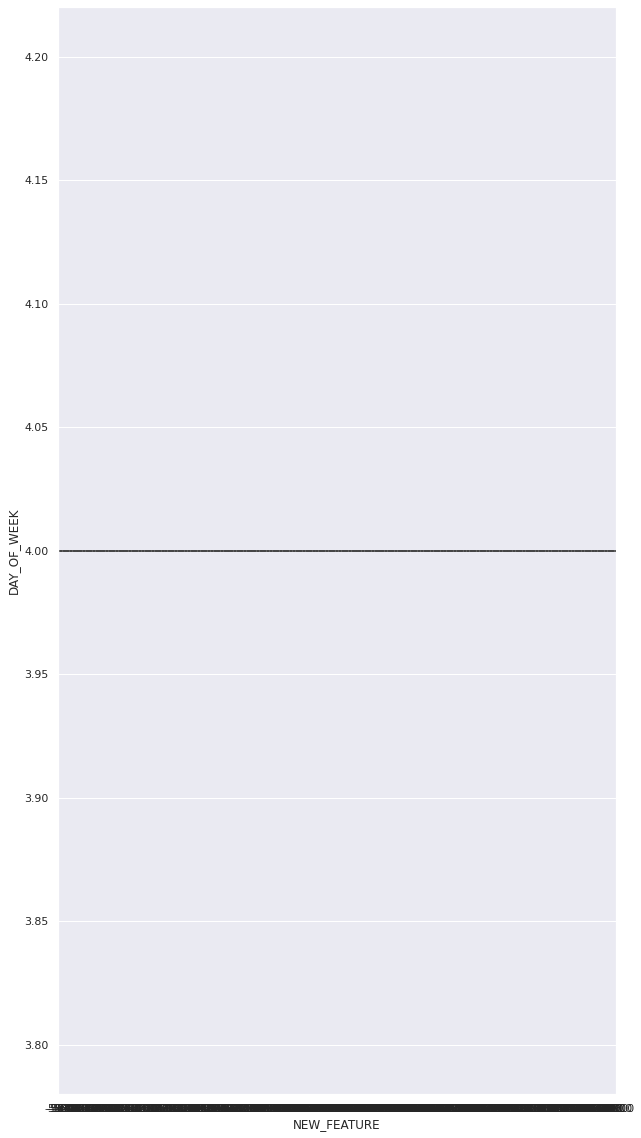

In [54]:

sns.boxplot(x="NEW_FEATURE" , 
            y='DAY_OF_WEEK' , 
            data = df_flights)

sns.set(rc={'figure.figsize':(20,30)})